In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
data_df = pd.read_csv('mapable.csv')
data_df['kpd']=data_df['points']/data_df['price'] 
data_df.sort_values(by='kpd', inplace=True)
data_df

id  country  points  price category         province  \
211845   80290   France      88   3300      red         Bordeaux   
151951   15840   France      96   2500      red         Bordeaux   
228709   98380   France      96   2500      red         Burgundy   
31843    34920   France      99   2300      red         Bordeaux   
12535    13318       US      91   2013    white       California   
...        ...      ...     ...    ...      ...              ...   
66585    73417  Romania      86      4    white  Viile Timisului   
114552  126595       US      86      4      red       California   
72409    80185       US      86      4      red       California   
254515  126096  Romania      86      4    white  Viile Timisului   
23425    25645       US      86      4      red       California   

                         variety        lat       long        kpd  
211845  Bordeaux-style Red Blend  46.227638   2.213749   0.026667  
151951  Bordeaux-style Red Blend  46.227638   2.213749   0.038400  
228709                Pinot Noir  46.227638   2.213749   0.038400  
31843   Bordeaux-style Red Blend  46.227638   2.213749   0.043043  
12535                 Chardonnay  37.090240 -95.712891   0.045206  
...                          ...        ...        ...        ...  
66585               Pinot Grigio  45.943161  24.966760  21.500000  
114552                    Merlot  37.090240 -95.712891  21.500000  
72409                     Merlot  37.090240 -95.712891  21.500000  
254515              Pinot Grigio  45.943161  24.966760  21.500000  
23425                     Merlot  37.090240 -95.712891  21.500000  

[258116 rows x 10 columns]

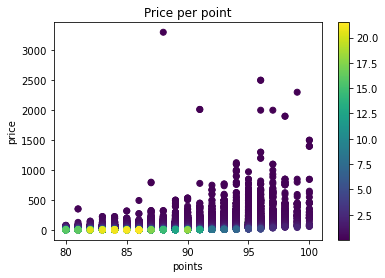

In [2]:
plt.title('Price per point')
plt.xlabel('points')
plt.ylabel('price')
plt.scatter(data_df['points'], data_df['price'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

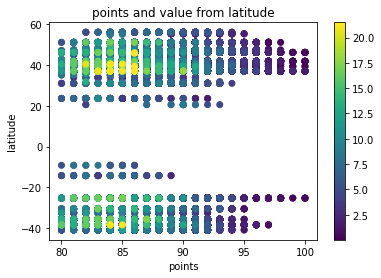

In [3]:
plt.title('points and value from latitude')
plt.xlabel('points')
plt.ylabel('latitude')
plt.scatter(data_df['points'], data_df['lat'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

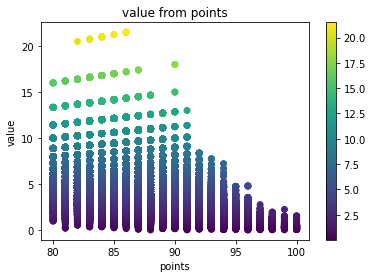

In [4]:
plt.title('value from points')
plt.xlabel('points')
plt.ylabel('value')
plt.scatter(data_df['points'], data_df['kpd'], c=data_df["kpd"], cmap='viridis')
plt.colorbar()

In [5]:
pull_df = pd.read_csv('updated_winery_dataset_categorized.csv')
records = pull_df[pull_df['id'] == 145389] 
records

id country                                        description  \
131926  145389      US  This Châteauneuf-style wine is jammy, with bla...   

        points  price    province variety winery category  
131926      90      5  California   Syrah  Fusée      red

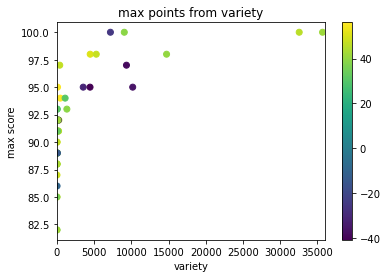

In [6]:
grouped_df=data_df.groupby('country').agg({'lat': 'min', 'long': 'min', 'variety':'count', 'points':'max'}).reset_index()
grouped_df.sort_values(by='points', inplace=True)
plt.title('max points from variety')
plt.xlabel('variety')
plt.ylabel('max score')
plt.scatter(grouped_df['variety'], grouped_df['points'], c=grouped_df["lat"], cmap='viridis')
plt.xlim([0, 36000])
plt.colorbar()

In [7]:
grouped_df=data_df
# Store latitude and longitude in locations
locations = grouped_df[["lat", "long"]]
# Fill NaN values and convert to float
rating = grouped_df["points"].astype(float)
# Plot Heatmap
fig = gmaps.figure()
# Create heat layer
# Add layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
good_df = data_df[data_df.points > 97]
locations = good_df[["lat", "long"]]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations,  
                                 dissipating=False, max_intensity=100,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
grouped_df=data_df.groupby('country').agg({'lat': 'min', 'long': 'min', 'variety':'count', 'points':'max'}).reset_index()
grouped_df.sort_values(by='points', inplace=True)
locations = grouped_df[["lat", "long"]]
fig = gmaps.figure()
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(marker_layer)
fig

Figure(layout=FigureLayout(height='420px'))